### Typical CNN Architecture
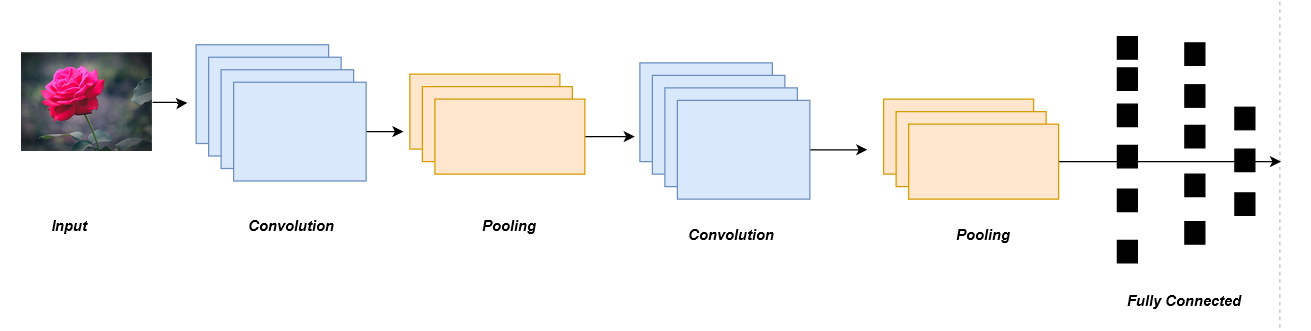

### Loading My Own Dataset

In [1]:
import os
import cv2
import matplotlib.pyplot as plt

DATADIR = "my_img_data"
CATEGORIES = ["not_waiting", "waiting"]
img = []

for category in CATEGORIES:
    path = os.path.join(DATADIR, category)
    for image in os.listdir(path):
        img = cv2.imread(os.path.join(path, image), cv2.IMREAD_GRAYSCALE)
        break
    break

In [2]:
def show_image(img):
    plt.imshow(img, cmap="gray")
    plt.axis("off")
    plt.show()

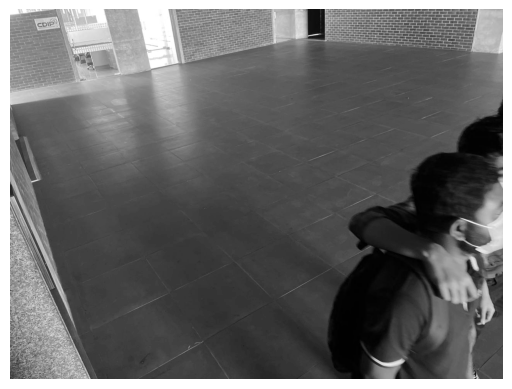

In [3]:
show_image(img)

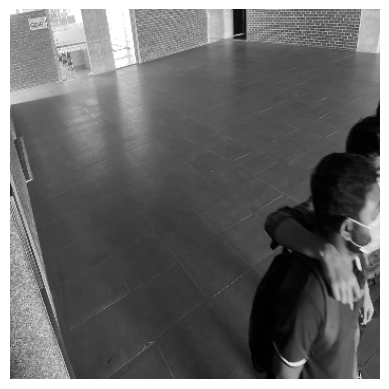

In [4]:
IMG_SIZE = 350
new_img = cv2.resize(img, (IMG_SIZE, IMG_SIZE))
show_image(new_img)

In [5]:
def create_training_img():
    training_img = []
    for category in CATEGORIES:
        class_no = CATEGORIES.index(category)
        path = os.path.join(DATADIR, category)
        for image in os.listdir(path):
            img = cv2.imread(os.path.join(path, image), cv2.IMREAD_GRAYSCALE)
            resized_img = cv2.resize(img, (IMG_SIZE, IMG_SIZE))
            training_img.append([resized_img, class_no])
    return training_img

In [6]:
training_img = create_training_img()

In [7]:
len(training_img)

135

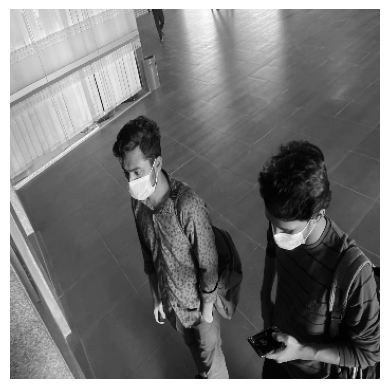

In [8]:
show_image(training_img[134][0])

In [9]:
training_img[134][1]

1

In [10]:
training_img[134][0].shape

(350, 350)

### Basic CNN Model

In [26]:
import tensorflow as tf
from functools import partial

DefaultConv2D = partial(
    tf.keras.layers.Conv2D, kernel_size=3, padding="same", activation="relu", kernel_initializer="he_normal"
)

model = tf.keras.Sequential([
    DefaultConv2D(filters=64, kernel_size=7, input_shape=[350,350,1]),
    tf.keras.layers.MaxPool2D(),
    DefaultConv2D(filters=128),
    DefaultConv2D(filters=128),
    tf.keras.layers.MaxPool2D(),
    DefaultConv2D(filters=256),
    DefaultConv2D(filters=256),
    tf.keras.layers.MaxPool2D(),
    DefaultConv2D(filters=512),
    DefaultConv2D(filters=512),
    tf.keras.layers.MaxPool2D(),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(units=128, activation="relu", kernel_initializer="he_normal"),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(units=128, activation="relu", kernel_initializer="he_normal"),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(units=64, activation="relu", kernel_initializer="he_normal"),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(units=1, activation="sigmoid")
])

model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy']
)

### Training The Model

In [27]:
import numpy as np

np.random.shuffle(training_img)

X = np.array([i[0] for i in training_img])
y = np.array([i[1] for i in training_img])

X = X / 255.0

NUM_EPOCHS = 5
history = model.fit(X, y, epochs=NUM_EPOCHS, validation_split=0.1)

Epoch 1/5
4/4 [==============================] - 145s 35s/step - loss: 12.3566 - accuracy: 0.4793 - val_loss: 0.6672 - val_accuracy: 0.7143
Epoch 2/5
4/4 [==============================] - 433s 56s/step - loss: 0.7579 - accuracy: 0.4793 - val_loss: 0.6616 - val_accuracy: 0.7143
Epoch 3/5
4/4 [==============================] - 428s 109s/step - loss: 0.6910 - accuracy: 0.5372 - val_loss: 0.6420 - val_accuracy: 0.7143
Epoch 4/5
4/4 [==============================] - 246s 63s/step - loss: 0.6657 - accuracy: 0.6364 - val_loss: 0.6134 - val_accuracy: 0.7143
Epoch 5/5
4/4 [==============================] - 152s 42s/step - loss: 0.6350 - accuracy: 0.6529 - val_loss: 0.5821 - val_accuracy: 0.7143


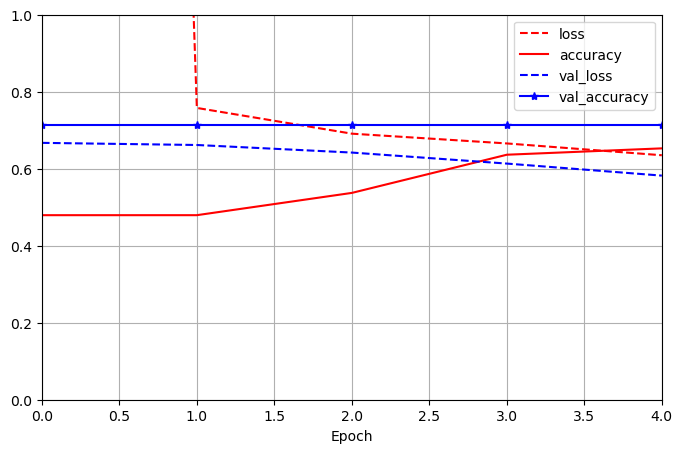

In [28]:
import pandas as pd

pd.DataFrame(history.history).plot(
    figsize = (8,5), xlim=[0,4], ylim=[0,1], grid=True, xlabel="Epoch",
    style=["r--", "r-", "b--", "b-*"]
)
plt.show()

### Testing The Model

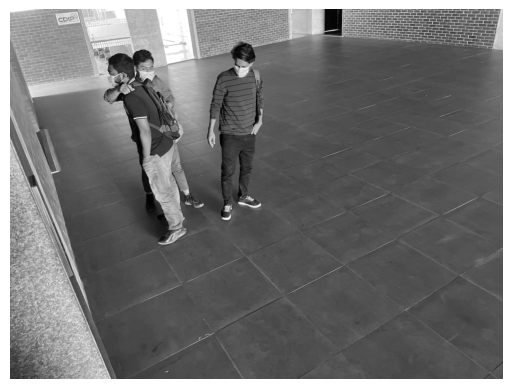

In [29]:
path = "my_img_data/waiting/1.jpg"
test_img = cv2.imread(path, cv2.IMREAD_GRAYSCALE)
resized_test_img = cv2.resize(test_img, (IMG_SIZE,IMG_SIZE))
resized_test_img = resized_test_img/255.0
show_image(test_img)

In [30]:
input_tensor = np.concatenate([resized_test_img, resized_test_img], axis=-1)
input_tensor = input_tensor.reshape(1, IMG_SIZE, IMG_SIZE, 2)
input_tensor = input_tensor.astype('float32') / 255.0
input_tensor = input_tensor[:, :, :, 0:1]
predictions = model.predict(input_tensor)
predicted_class = np.argmax(predictions)
print(predicted_class)

1/1 [==============================] - 3s 3s/step
0


In [41]:
for i in range(60,70):
    path = f"my_img_data/waiting/{i}.jpg"
    test_img = cv2.imread(path, cv2.IMREAD_GRAYSCALE)
    resized_test_img = cv2.resize(test_img, (IMG_SIZE,IMG_SIZE))
    resized_test_img = resized_test_img/255.0
    input_tensor = np.concatenate([resized_test_img, resized_test_img], axis=-1)
    input_tensor = input_tensor.reshape(1, IMG_SIZE, IMG_SIZE, 2)
    input_tensor = input_tensor.astype('float32') / 255.0
    input_tensor = input_tensor[:, :, :, 0:1]
    predictions = model.predict(input_tensor)
    predicted_class = np.argmax(predictions)
    print(predicted_class)

1/1 [==============================] - 0s 241ms/step
0
1/1 [==============================] - 0s 241ms/step
0
1/1 [==============================] - 0s 241ms/step
0
1/1 [==============================] - 0s 241ms/step
0
1/1 [==============================] - 0s 251ms/step
0
1/1 [==============================] - 0s 240ms/step
0
1/1 [==============================] - 0s 233ms/step
0
1/1 [==============================] - 0s 248ms/step
0
1/1 [==============================] - 0s 259ms/step
0
1/1 [==============================] - 0s 242ms/step
0


Model answers '0' for all imgaes, due to poor amount of images. I will ran other pre-trained model for this in another notebook.

In [57]:
X_reshaped = np.expand_dims(X[20:30], axis=-1)  # Add channel dimension
predictions = model.predict(X_reshaped)
for prediction in predictions:
    predicted_class = np.argmax(prediction)
    print(predicted_class)

1/1 [==============================] - 2s 2s/step
0
0
0
0
0
0
0
0
0
0


In [58]:
y[20:30]

array([1, 1, 0, 1, 1, 0, 1, 1, 0, 1])